<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_3/Lab_03_Exploration_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shows the number of page hits per day**
https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv

---



---



In [73]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np


In [74]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv")
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
data.head()

,Date,001,002,003,004,005,006,007,008,009,...,158,159,160,161,162,163,164,165,166,167
1970-01-01 00:00:00.000000000,2019-01-01,1062,33,67,42,0,4,0,0,1,...,0,0,4,0,10,2,2,2,0,0
1970-01-01 00:00:00.000000001,2019-01-02,976,41,72,19,2,0,0,14,1,...,5,0,0,7,0,0,0,0,1,3
1970-01-01 00:00:00.000000002,2019-01-03,956,27,71,28,4,6,11,0,0,...,0,0,0,0,6,0,0,3,0,0
1970-01-01 00:00:00.000000003,2019-01-04,976,30,57,29,0,0,3,0,2,...,0,2,0,0,0,0,0,0,0,7
1970-01-01 00:00:00.000000004,2019-01-05,956,45,65,27,4,1,0,0,0,...,12,0,0,4,0,0,0,0,5,2


#**1. Create an initial exploratory chart showing line plots for all pages using one of the examples from the lecture. There is one (obvious) item that won’t fit in the plot – the legend of all 167 pages – remove it by commenting out a line of code by putting a "#" symbol at the start of the line.**

---



---



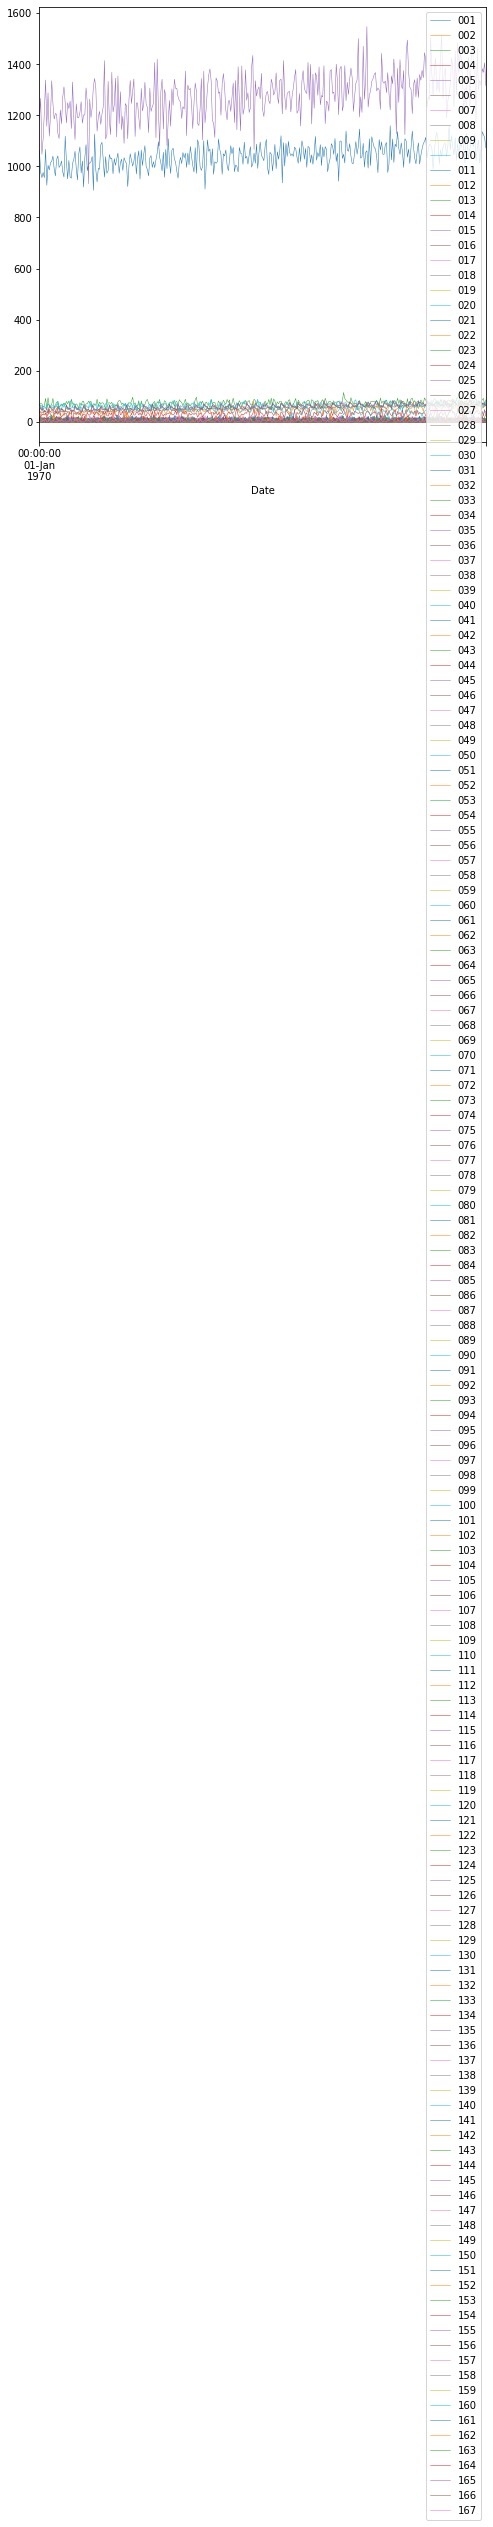

In [75]:
data.plot.line(linewidth=0.5, figsize=(8, 8), xlabel="Date")



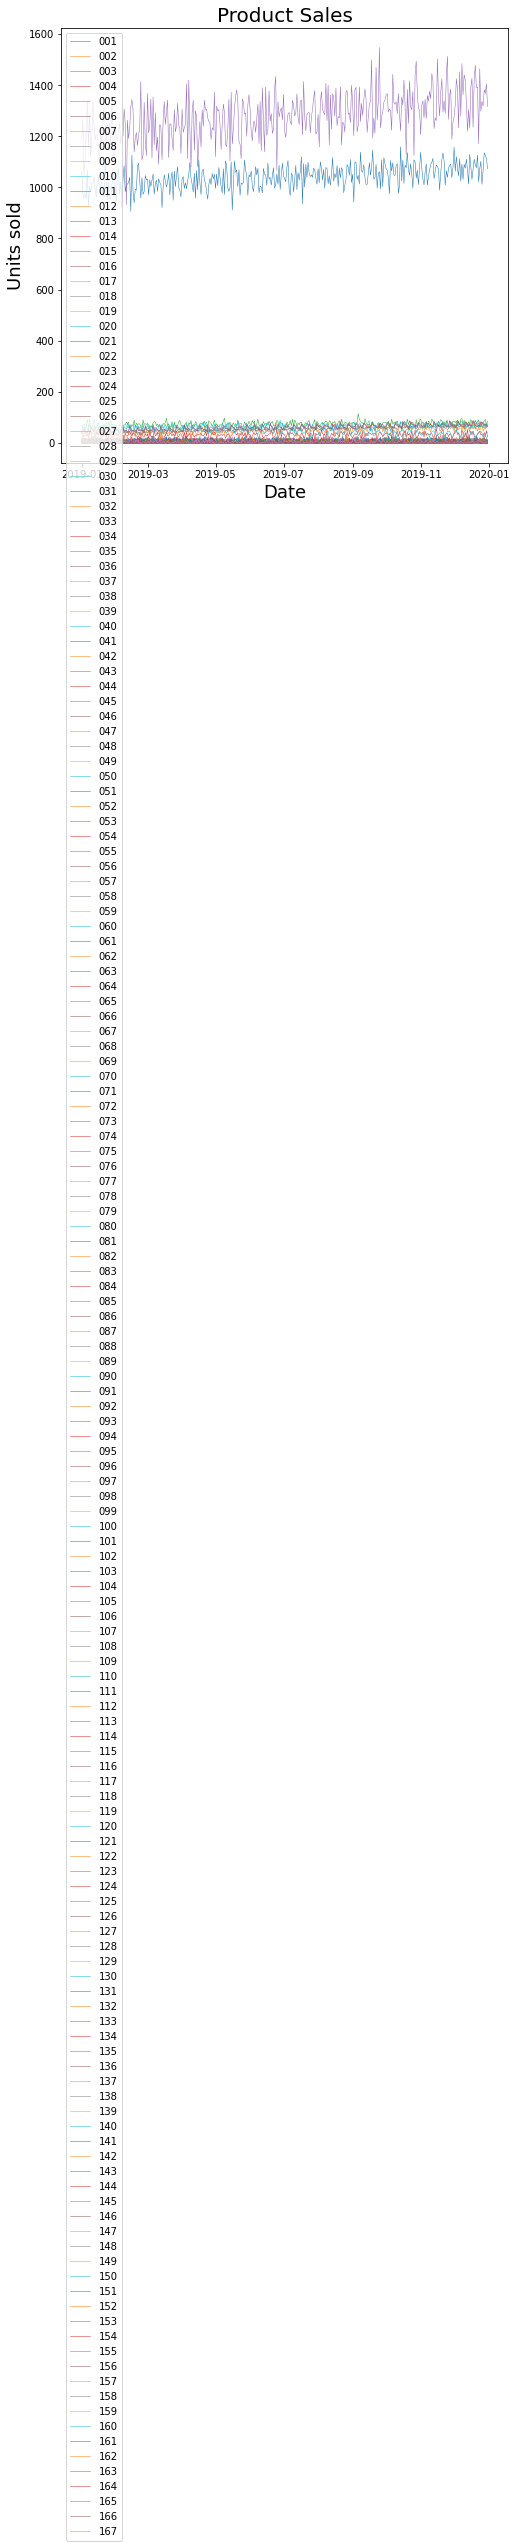

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
data.head()

# data.plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Product Sales', fontsize=20)
plt.legend(data.columns, loc=2)
plt.show()

##**2. The high volume pages are not particularly interesting as most visitors to the site use these. Instead the company is interested in driving up engagement with the site by getting users to explore further. They want to focus on medium volume pages, so create a chart showing line plots for these with a legend indicating which is which. [Hint: there are 8 medium volume pages – you should have identified them last week.]**

            002  003  004  010  048  080  155  156
Date                                              
2019-01-01   33   67   42   69   37   67   39   47
2019-01-02   41   72   19   62   39   61   59   56
2019-01-03   27   71   28   64   38   44   58   46
2019-01-04   30   57   29   52   35   61   39   52
2019-01-05   45   65   27   55   45   61   40   41


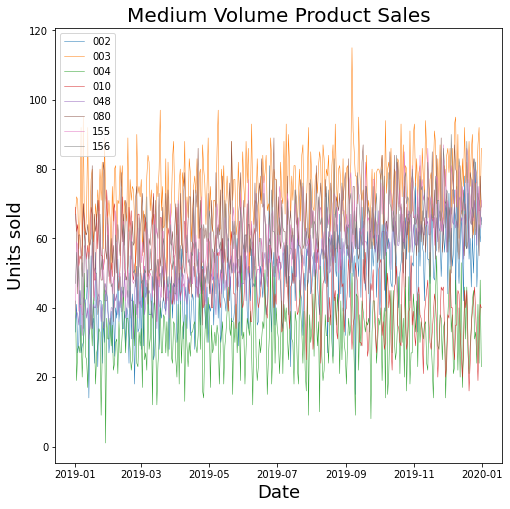

In [77]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

selected = ["002", "003", "004", "010", "048", "080", "155", "156"]
print(data[selected].head())

# data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Medium Volume Product Sales', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#**3. The previous chart is a little overcrowded, so create a further chart for medium volume pages which also includes a 14-day rolling average for each time series.**

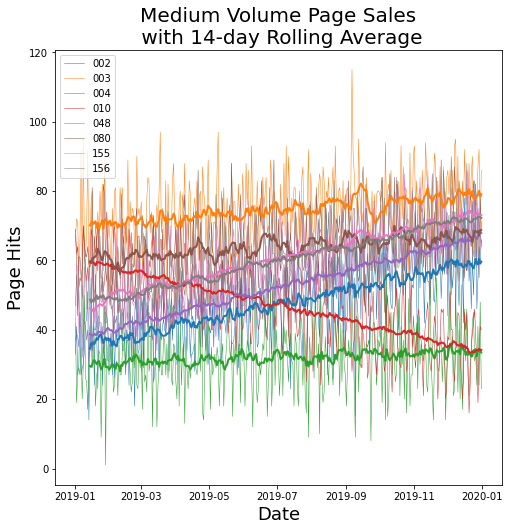

In [78]:
#This bit of code plots the ROLLING AVERAGE

period = 14
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Medium Volume Page Sales\n with 14-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()


#**4. Now create a further chart for medium volume pages which also includes a trendline (so it should show the original time series, 14-day rolling average and trendline combined).**

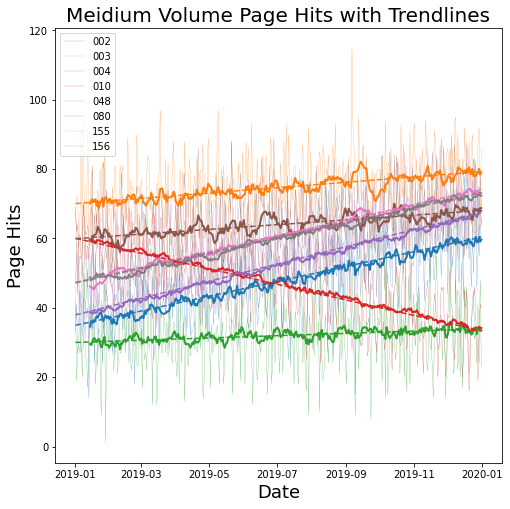

In [79]:
#This bit of code plots the ROLLING AVERAGE
period = 14
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.2)
plt.gca().set_prop_cycle(None) #TREND LINE
plt.plot(rolling_average[selected], linewidth=2) #ROLLING AVERAGE

#This bit of code plots the TRENDLINE----------------------------------------------------------------------
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
#----------------------------------------------------------------------------------------------------------

# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Meidium Volume Page Hits with Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#**5. Finally make the plot a little easier to interpret as follows:** 
a. Make the line width a little thinner for the original time series
but not so thin that it can’t be seen.

b. Make the trendline a dashed line rather than continuous.
[Hint: search the lecture notes for the linestyle parameter.]

c. Manually reorder the selected pages so that the order of
items in the legend (top to bottom) matches the visual order
of the lines in the chart. 

[Hint: if you plot the rolling average lines before plotting the original
time-series, matplotlib will show thick lines in the legend (as it picks
the first set of lines to create the legend; also don’t forget to reset the
colours twice (before each new set of lines).]
Your final chart should look similar to the one on the right.**

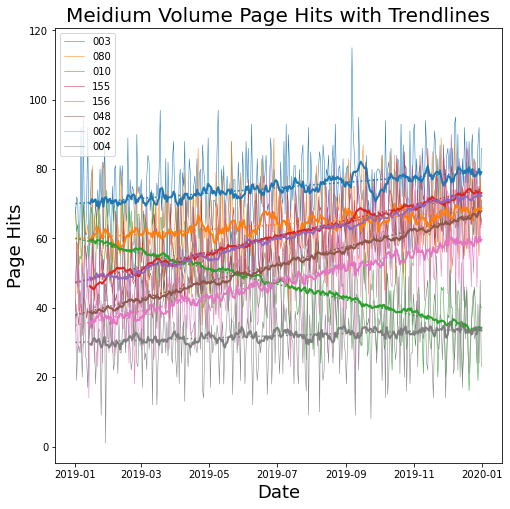

In [80]:
selected = ["003", "080", "010", "155", "156", "048", "002", "004"] #REARRANGED LINES here 


#This bit of code plots the ROLLING AVERAGE
period = 14
rolling_average = data.rolling(window=period).mean()
#----------------------------------------------------------------------------------------------------------


plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5) #Width of lines in graph
plt.gca().set_prop_cycle(None) #TREND LINE
plt.plot(rolling_average[selected], linewidth=2) #ROLLING AVERAGE

#This bit of code plots the TRENDLINE----------------------------------------------------------------------
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    # plt.plot(data.index, trend(x), linestyle='--')
    plt.plot(data.index, trend(x), linestyle=":") #DOTTED LINE
#----------------------------------------------------------------------------------------------------------

# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Meidium Volume Page Hits with Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()